# MC920 - Trabalho 5

Neste notebook, são geradas e são salvas as imagens.

A implementação do código foi altamente influenciada pela [documentação](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html) do sckit-image.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from skimage.io import imsave
from time import time

from utils import *

### (1)  Ler as imagens coloridas de entrada.

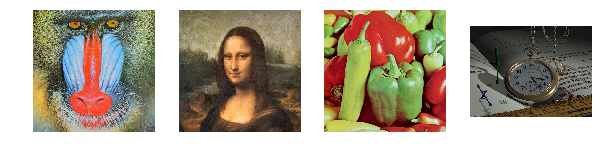

In [2]:
images = load_images('input')
plot_images(images)

### (2) Aplicar a técnica  k-means de agrupamento de dados para encontrar grupos de cores mais representativas.

In [3]:
n_colors = 4

num_imgs = len(images)
output_labels = []
output_labels_random = []
kmeans_objects = []
codebook_randoms  = []
for i in range(num_imgs):
    
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    images [i] = np.array(images[i], dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(images[i].shape)
    assert d == 3
    image_array = np.reshape(images[i], (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    kmeans_objects.append(kmeans)
    print("done in %0.3fs." % (time() - t0))

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    output_labels.append(labels)
    print("done in %0.3fs." % (time() - t0))
    
    codebook_random = shuffle(image_array, random_state=0)[:n_colors]
    codebook_randoms.append(codebook_random)
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random,
                                              image_array,
                                              axis=0)
    output_labels_random.append(labels_random)
    print("done in %0.3fs." % (time() - t0))
    

Fitting model on a small sub-sample of the data
done in 0.112s.
Predicting color indices on the full image (k-means)
done in 0.050s.
Predicting color indices on the full image (random)
done in 0.040s.
Fitting model on a small sub-sample of the data
done in 0.100s.
Predicting color indices on the full image (k-means)
done in 0.009s.
Predicting color indices on the full image (random)
done in 0.011s.
Fitting model on a small sub-sample of the data
done in 0.103s.
Predicting color indices on the full image (k-means)
done in 0.058s.
Predicting color indices on the full image (random)
done in 0.039s.
Fitting model on a small sub-sample of the data
done in 0.135s.
Predicting color indices on the full image (k-means)
done in 0.099s.
Predicting color indices on the full image (random)
done in 0.102s.


In [4]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

### (4) Reconstruir a imagem com cores reduzidas a partir do dicion ́ario armazenado

/home/ntkm/miniconda3/envs/env3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


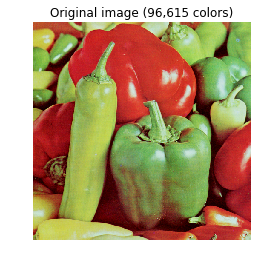

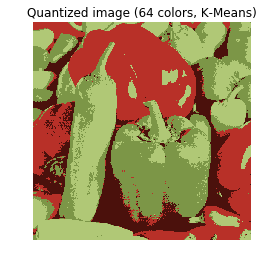

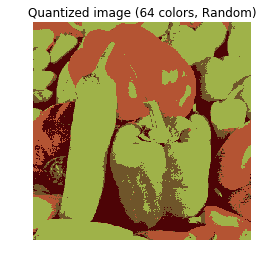

In [5]:
i = 2
w,h,_ = images[i].shape

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')

plt.imshow(images[i])

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (K-Means)')
kmeans_recreated = recreate_image(kmeans_objects[i].cluster_centers_, output_labels[i], w, h)
plt.imshow(kmeans_recreated)
imsave(str(i) + '_' + str(n_colors) + '_kmeans.png',kmeans_recreated)

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (Random)')
random_recreated = recreate_image(codebook_randoms[i], output_labels_random[i], w, h) 
plt.imshow(random_recreated)
plt.show()
imsave(str(i) + '_' + str(n_colors) + '_random.png', random_recreated)

### Calcula a entropia da imagem para diferentes quantizações

In [16]:
num_imgs = len(images)
output_labels = []
output_labels_random = []
kmeans_objects = []
codebook_randoms  = []
n_colors = [4, 8, 16, 32, 64, 128]
i = 3

for n in n_colors:
    
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    images [i] = np.array(images[i], dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(images[i].shape)
    assert d == 3
    image_array = np.reshape(images[i], (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample)
    kmeans_objects.append(kmeans)
    print("done in %0.3fs." % (time() - t0))

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    output_labels.append(labels)
    print("done in %0.3fs." % (time() - t0))
    
    codebook_random = shuffle(image_array, random_state=0)[:n]
    codebook_randoms.append(codebook_random)
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random,
                                              image_array,
                                              axis=0)
    output_labels_random.append(labels_random)
    print("done in %0.3fs." % (time() - t0))
    

Fitting model on a small sub-sample of the data
done in 0.895s.
Predicting color indices on the full image (k-means)
done in 0.076s.
Predicting color indices on the full image (random)
done in 0.068s.
Fitting model on a small sub-sample of the data
done in 0.954s.
Predicting color indices on the full image (k-means)
done in 0.137s.
Predicting color indices on the full image (random)
done in 0.145s.
Fitting model on a small sub-sample of the data
done in 1.072s.
Predicting color indices on the full image (k-means)
done in 0.215s.
Predicting color indices on the full image (random)
done in 0.237s.
Fitting model on a small sub-sample of the data
done in 1.367s.
Predicting color indices on the full image (k-means)
done in 0.387s.
Predicting color indices on the full image (random)
done in 0.421s.
Fitting model on a small sub-sample of the data
done in 2.143s.
Predicting color indices on the full image (k-means)
done in 0.705s.
Predicting color indices on the full image (random)
done in 0.7

In [27]:
from skimage.measure import shannon_entropy
i = 3
w,h,_ = images[i].shape

for j in range(len(n_colors)):
    image = recreate_image(kmeans_objects[j].cluster_centers_,output_labels[j],w,h)
    e = shannon_entropy(np.mean(image, axis=2))
    print('n_colors', n_colors[j], 'Entropy', e)
    
print('Reference entropy', shannon_entropy(np.mean(images[i], axis=2)))

n_colors 4 Entropy 1.9523823584822546
n_colors 8 Entropy 2.832807900464526
n_colors 16 Entropy 3.7011710119414505
n_colors 32 Entropy 4.519617321650198
n_colors 64 Entropy 5.479764806919041
n_colors 128 Entropy 6.307221892495521
Reference entropy 9.249633935796215
